# Beginning Simply

The library EBImage provides a series of image processing images that allow filtering, cropping, adjusting of images at a level similar to Python (though many functions are missing, such as the TV filter).

## Working with a set of images

In [15]:
if (!("BiocManager" %in% rownames(installed.packages()))) {
    install.packages("BiocManager")
}

if (!("EBImage" %in% rownames(installed.packages()))) {
    BiocManager::install("EBImage")
}

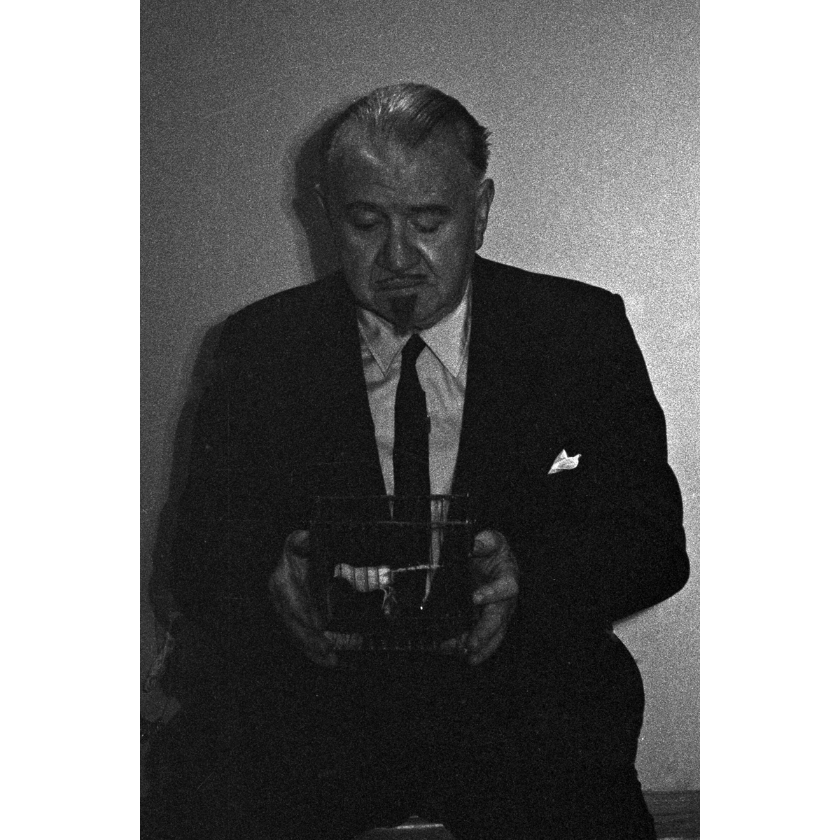

In [17]:
library(EBImage)

Image <- readImage('http://upload.wikimedia.org/wikipedia/commons/6/69/GeraldHeaneyMagician.png')
display(Image)

In [18]:
print(Image)

Image 
  colorMode    : Grayscale 
  storage.mode : double 
  dim          : 800 1200 
  frames.total : 1 
  frames.render: 1 

imageData(object)[1:5,1:6]
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 0.2549020 0.2941176 0.2666667 0.2392157 0.3803922 0.3333333
[2,] 0.2980392 0.2941176 0.3098039 0.2745098 0.2352941 0.3058824
[3,] 0.2274510 0.2627451 0.2588235 0.2470588 0.2274510 0.2274510
[4,] 0.2470588 0.2588235 0.2509804 0.2666667 0.2156863 0.2039216
[5,] 0.2549020 0.3058824 0.3176471 0.2431373 0.2470588 0.2627451


### Dealing with image issues

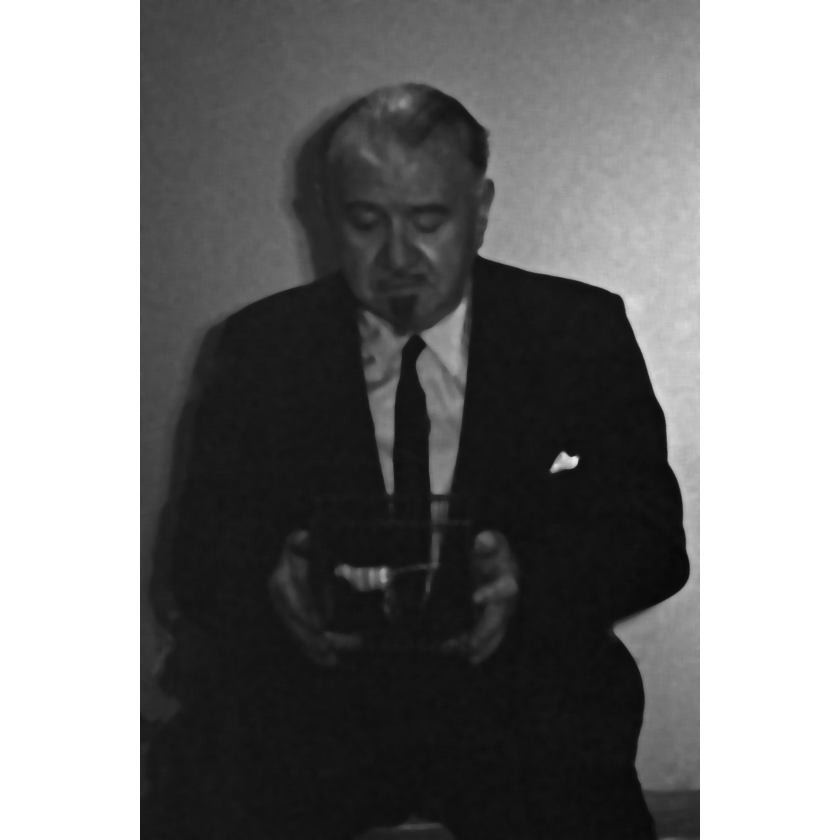

In [20]:
median = medianFilter(Image, 5)
display(median, title='Median filter')

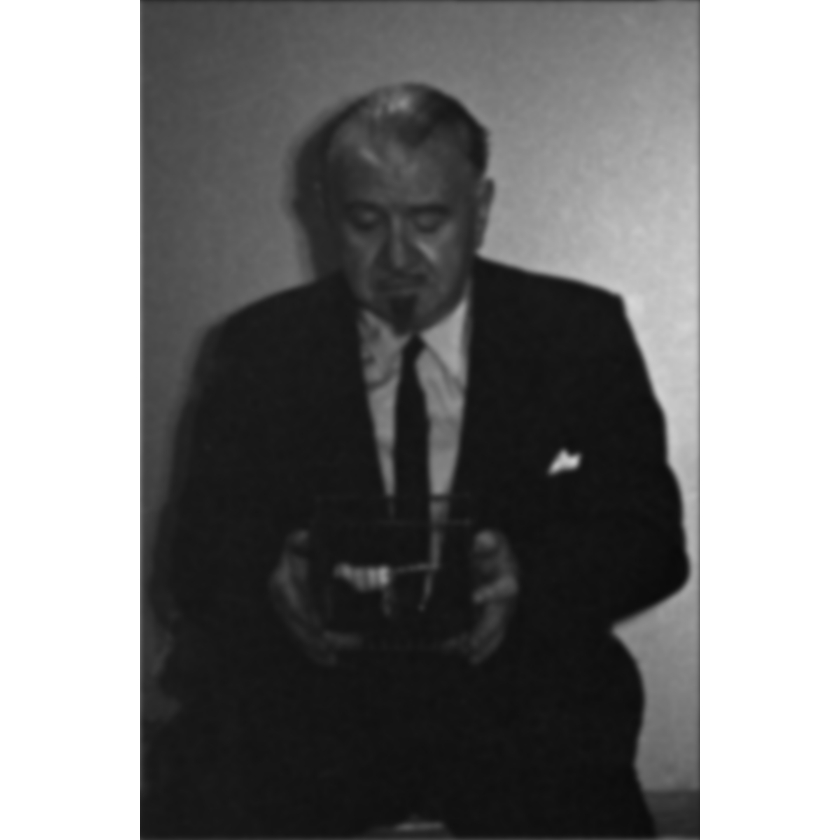

In [21]:
gaussian_filter = gblur(Image, sigma=4)
# Display image
display(gaussian_filter, title='Gaussian filter')

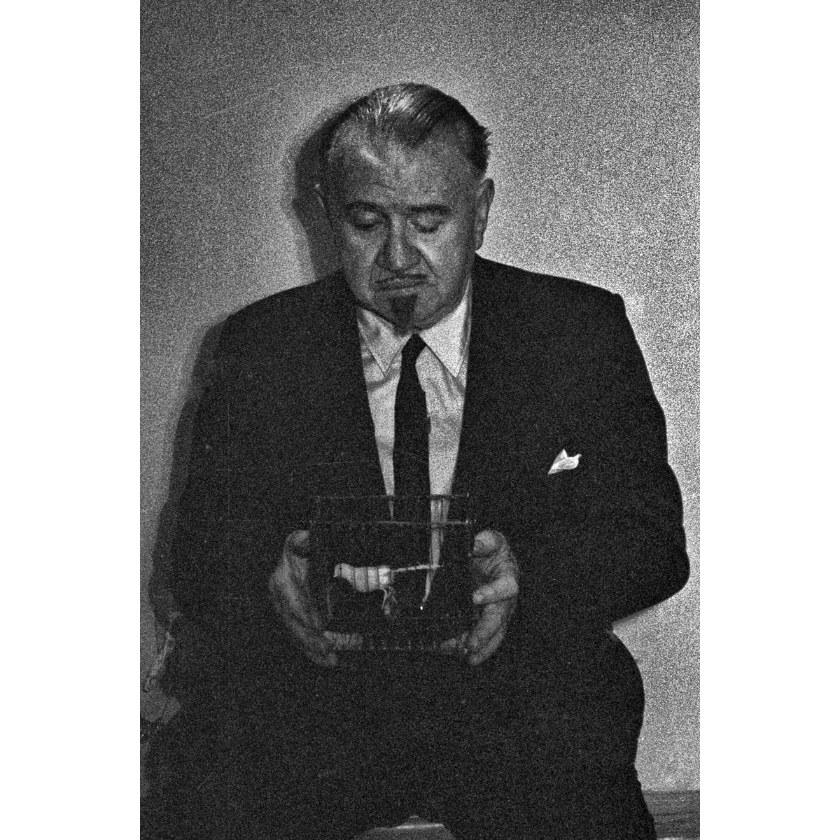

In [24]:
clahe_filter = clahe(Image)
display(clahe_filter, title='Adaptive histogram equalization')

### Manipulating the image

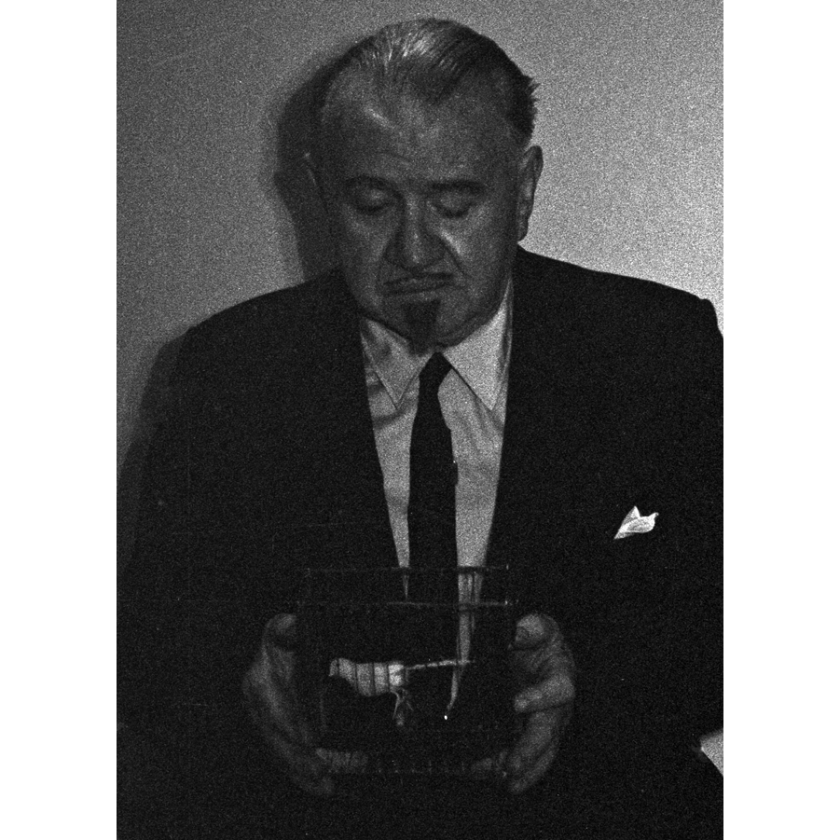

In [50]:
display(Image[50:700, 100:1000])

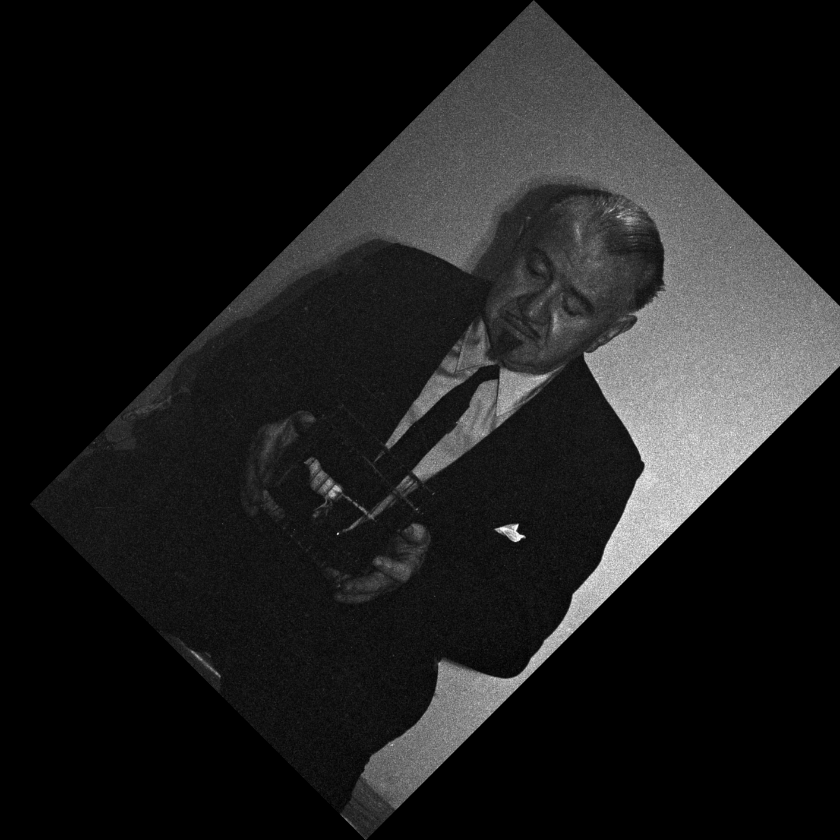

In [51]:
Imagetr <- translate(rotate(Image, 45), c(50, 0))
display(Imagetr)

## Recognizing faces using Eigenfaces

In R the faces in the wild dataset is not available. We have therefore built our examples on the Olivetti faces dataset, proving how to retrace similar images using components from a PCA analysis and how, using support vector machines, to classify individuals faces learning from a few poses of them.

In [1]:
if (!("RnavGraphImageData" %in% rownames(installed.packages()))) {
    install.packages("RnavGraphImageData")
}

In [2]:
library(RnavGraphImageData)

In [3]:
faces <- NULL
utils::data("faces", envir = environment())

df <- as.data.frame(t(faces))

npeople <- 40
nposes <- 10
colnames(df) <- sapply(seq(1, 4096), function(x) { paste0("px", x)})
rownames(df) <- apply(expand.grid(seq(1, nposes), seq(1, npeople)), 1,
                    function(x) { paste(x[2], x[1], sep = "_") })
Label <-  factor(as.numeric(cut(1:nrow(df), npeople)))

In [4]:
Label

[1] 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3 
 [26] 3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5 
 [51] 6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8 
 [76] 8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  10 10 10 10 10 10 10 10 10 10
[101] 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13
[126] 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15
[151] 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18
[176] 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20
[201] 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23
[226] 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25
[251] 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28
[276] 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30
[301] 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 33 33 33 33 33
[326] 33 33 33 33 33 34 34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35
[351] 36 36 36 36 36 36 36 36 36 36 37 37 37 37 37 37 37 37 37 37 38 38 38 38 38
[376] 38 38 38 38 38 39 39 39 39 39 39 39 39 39 39 40 40 40 40 40 40 40 40 40 40
40 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 40

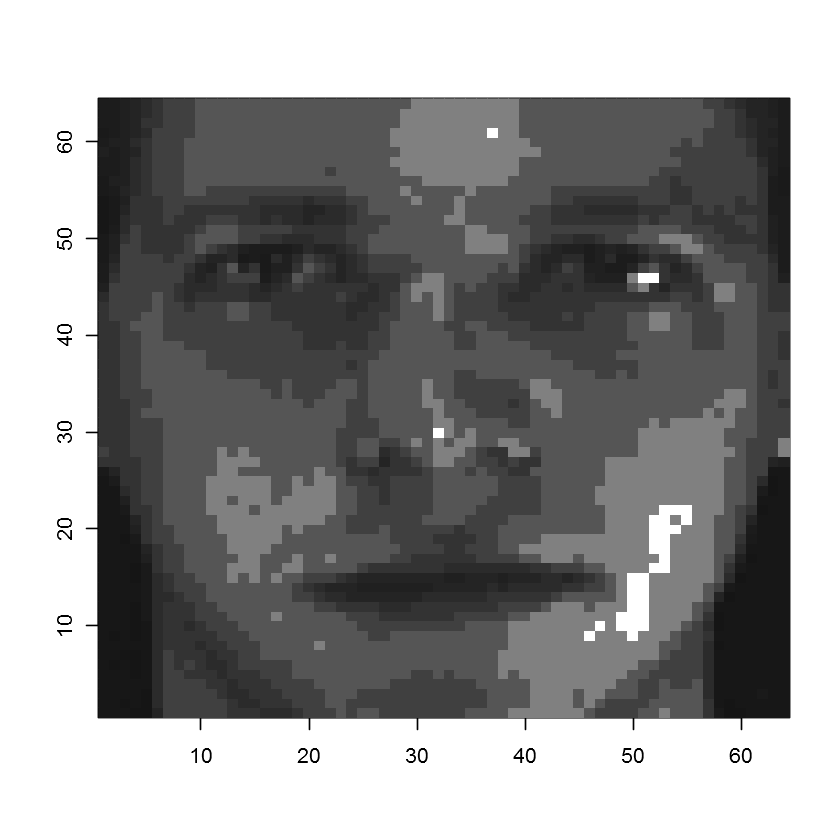

In [5]:
display_face <- function(n) {
    face <- t(matrix(as.numeric(df[n, 4096:1]), ncol = 64, nrow = 64))
graphics::image(1:nrow(face), 1:nrow(face), face, 
                xlab = "", ylab = "", 
                col = grDevices::gray(1 / 12:1))
}

display_face(1)

In [7]:
pca <- prcomp(df, center = TRUE, scale. = TRUE)
components <- predict(pca, newdata=df)

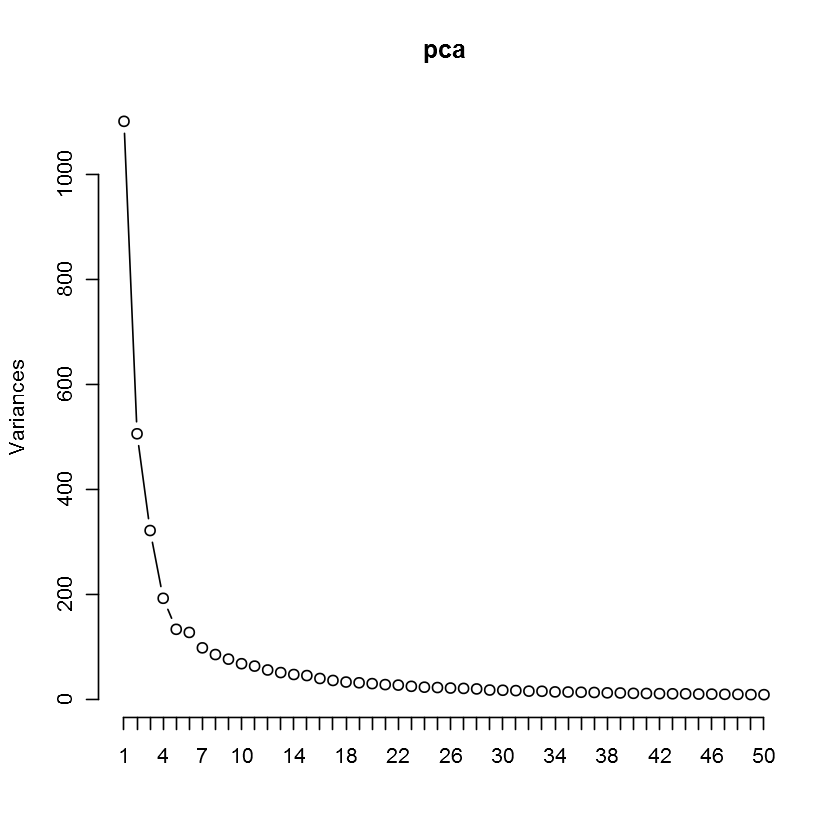

In [9]:
screeplot(pca, type='lines', npcs=50)

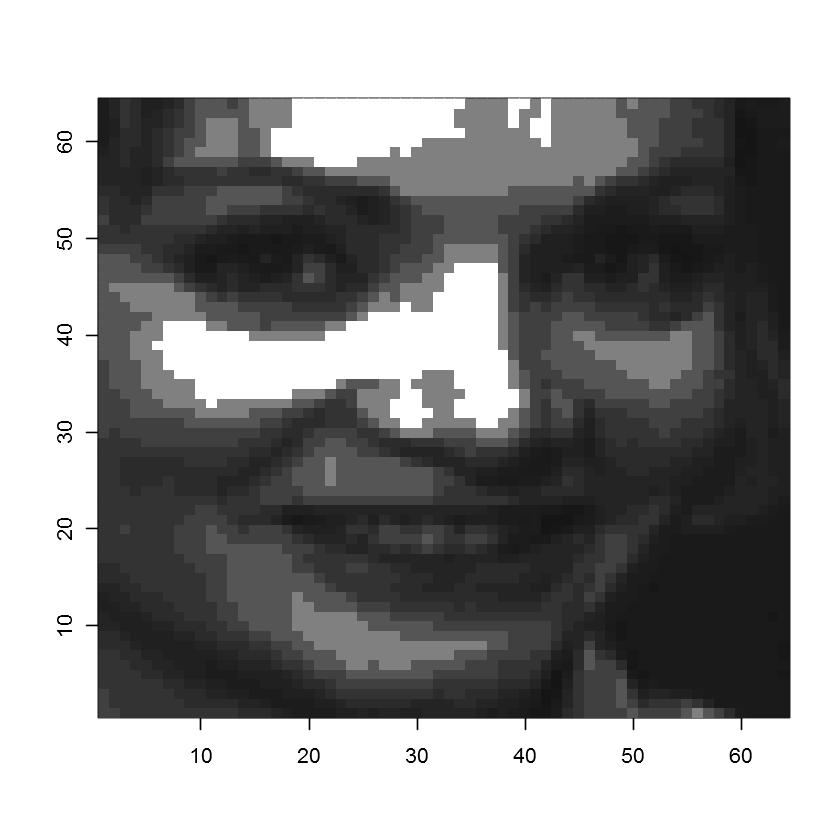

In [12]:
# Our reference image, let's look for similar ones
reference <- components[350,]
display_face(350)

In [13]:
compute_distance <- function(img) {
    return (sum((img - reference[1:top_components])^2))
}

top_components <- 25
results <- apply(components[,1:top_components], 1, compute_distance)
top_nearest <- order(results)

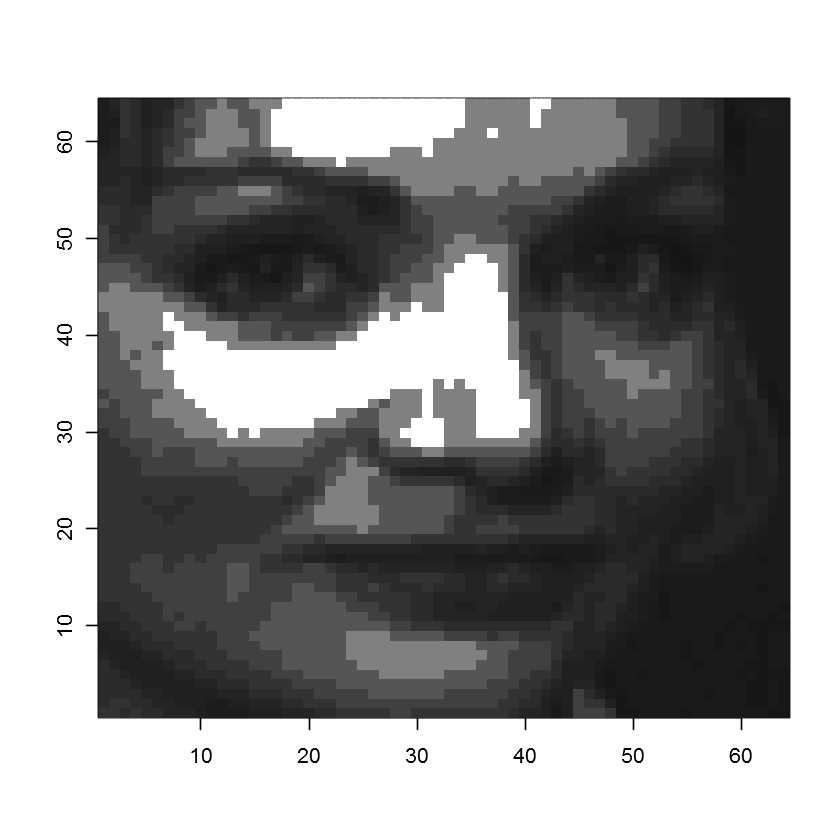

In [14]:
display_face(top_nearest[2])

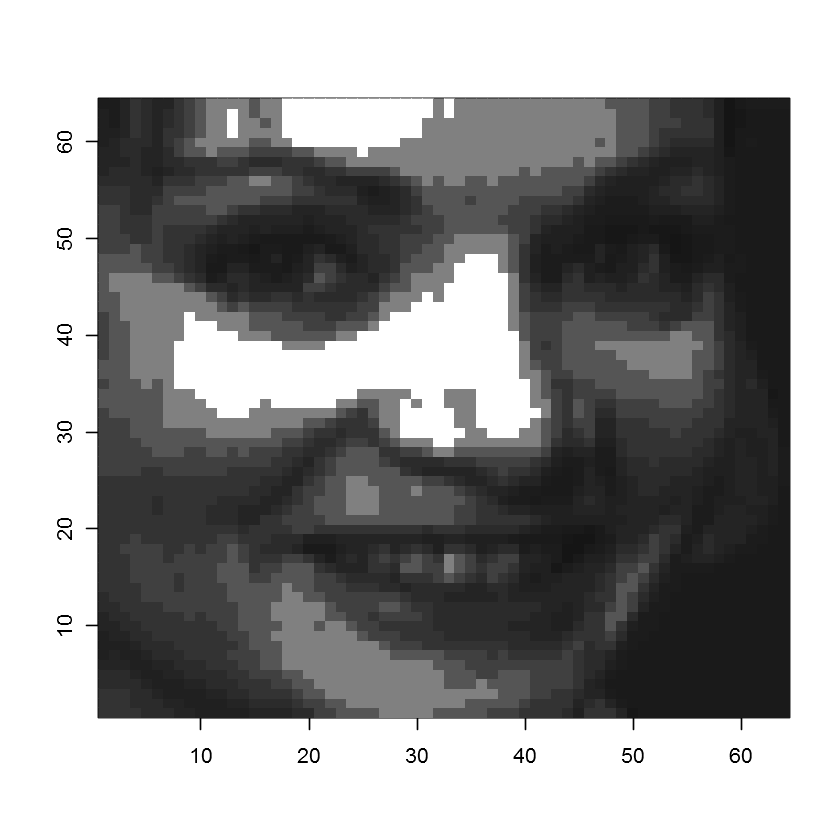

In [15]:
display_face(top_nearest[3])

## Classifying images

In [214]:
persons <- 40
train_poses <- 1:5
test_poses <- 6:10


train_set <- apply(expand.grid(persons, train_poses), 1, paste, collapse="_")
test_set <- apply(expand.grid(persons, test_poses), 1, paste, collapse="_")

In [230]:
train_set <- rep(c(rep(TRUE, 5), rep(FALSE, 5)), 40)
test_set <- rep(c(rep(FALSE, 5), rep(TRUE, 5)), 40)

In [235]:
dim(df[train_set,])

[1]  200 4096

In [334]:
library(e1071)

top_components <- 50
model_svm <- svm(Label[train_set] ~ . , data=components[train_set, 1:top_components], 
                 method="C-classification", kernal="radial", 
                 gamma=0.01, cost=10)

In [335]:
predictions <- predict(model_svm, components[test_set, 1:top_components])

In [336]:
groud_truth <- rep(1:40, 5)
groud_truth <- as.factor(groud_truth[order(groud_truth)])
accuracy <- sum(predictions==groud_truth) / length(groud_truth)
print(accuracy)

[1] 0.915


In [337]:
if (!("caret" %in% rownames(installed.packages()))) {
    install.packages("caret")
}

conf_mtx <- confusionMatrix(data=predictions, reference=groud_truth)

In [338]:
conf_mtx$overall

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  9.150000e-01   9.128205e-01   8.673948e-01   9.497041e-01   2.500000e-02 
AccuracyPValue  McnemarPValue 
 7.939216e-270            NaN

In [339]:
print(conf_mtx)

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
        1  5 0 0 0 0 0 0 1 0  0  0  0  2  0  0  0  3  0  0  0  0  0  0  0  0  0
        2  0 5 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        3  0 0 3 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        4  0 0 0 5 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        5  0 0 0 0 5 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        6  0 0 0 0 0 5 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        7  0 0 0 0 0 0 5 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        8  0 0 0 0 0 0 0 4 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        9  0 0 0 0 0 0 0 0 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        10 0 0 0 0 0 0 0 0 0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
        11 0 0 0 0 0 0 0 0 0  0  5  0  0  0  0  0  0  0  0  0  0  0

# Moving to CNN with Character Recognition

## Accessing the dataset

In [1]:
if (!("keras" %in% rownames(installed.packages()))) {
    install.packages("devtools")
    devtools::install_github("rstudio/keras")
    reticulate::py_config()
}

# If necessary, please download and install Rtools 3.5 from http://cran.r-project.org/bin/windows/Rtools/

In [16]:
library(keras)
reticulate::py_config()

mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# We count how many pixels are in each image
pixels <- dim(x_train)[2] * dim(x_train)[3]

python:         C:\Users\Luca\ANACON~1\python.exe
libpython:      C:/Users/Luca/ANACON~1/python36.dll
pythonhome:     C:\Users\Luca\ANACON~1
version:        3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
Architecture:   64bit
numpy:          C:\Users\Luca\ANACON~1\lib\site-packages\numpy
numpy_version:  1.15.4

python versions found: 
 C:\Users\Luca\ANACON~1\python.exe
 C:\Users\Luca\Anaconda3\python.exe
 C:\Users\Luca\Anaconda3\envs\aind\python.exe
 C:\Users\Luca\Anaconda3\envs\algo4dummies\python.exe
 C:\Users\Luca\Anaconda3\envs\dl4dummies\python.exe
 C:\Users\Luca\Anaconda3\envs\gym\python.exe
 C:\Users\Luca\Anaconda3\envs\ml4dit\python.exe
 C:\Users\Luca\Anaconda3\envs\p4ds4d\python.exe
 C:\Users\Luca\Anaconda3\envs\pds4dummies2\python.exe
 C:\Users\Luca\Anaconda3\envs\py27\python.exe
 C:\Users\Luca\Anaconda3\envs\style-transfer\python.exe
 C:\Users\Luca\Anaconda3\envs\tensorflow\python.exe
 C:\Users\Luca\Anaconda3\envs\tensorflow_api

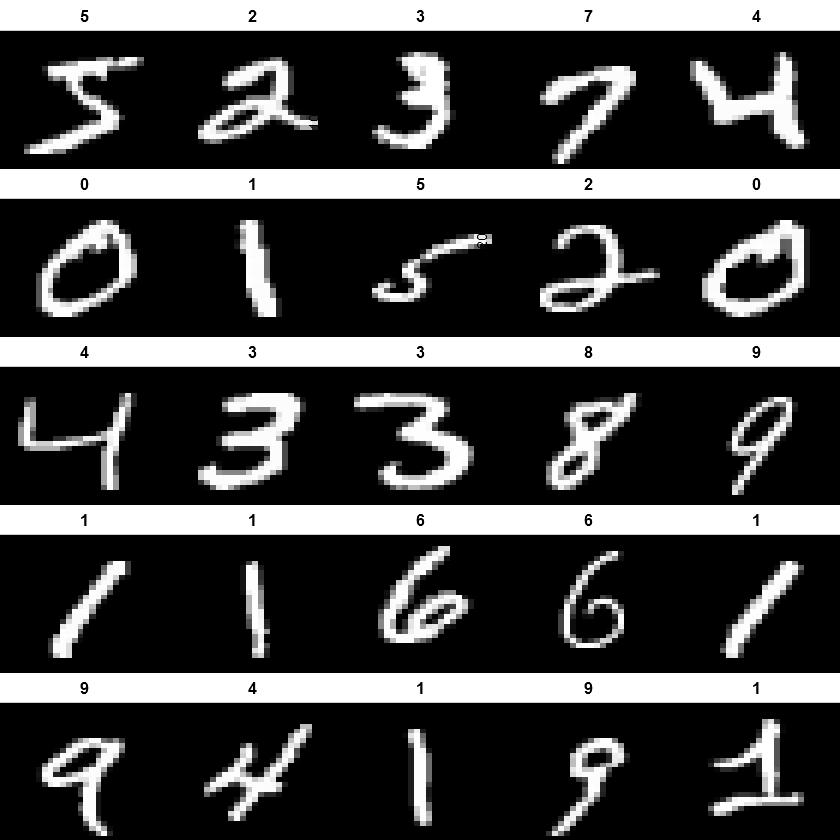

In [6]:
# Plotting a sample from the data

par(mfcol=c(5,5), mar=c(0, 0, 2, 0), xaxs='i', yaxs='i')
for (idx in 1:25) { 
    im <- t(apply(x_train[idx,,], 2, rev)) 
    image(1:28, 1:28, im, col=gray((0:255)/255), xaxt='n', main=paste(y_train[idx]))
    }

In [7]:
# Extending image data to be a vector
x_train <- array_reshape(x_train, c(dim(x_train)[1], pixels))
x_test <- array_reshape(x_test, c(dim(x_test)[1], pixels))

# We record the input shape
input_shape = dim(x_train)[2:length(dim(x_train))]

# Performing the normalization
x_train <- x_train / 255
x_test <- x_test / 255

In [8]:
# We count how many target classes are there
num_classes <- length(unique(y_train))

# One Hot Encode target classes
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

In [9]:
# Create model using piping %>%
# Specify which model to use
model <- keras_model_sequential() 

# Add layers to the model
model %>%  
  layer_dense(units = pixels, activation = 'relu', input_shape=input_shape) %>% 
  layer_dense(units = num_classes, activation = 'softmax')

# Compile the model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adam(),
  metrics=c('categorical_accuracy')
)

# Summary of the model
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 784)                     615440      
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      7850        
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
________________________________________________________________________________



In [10]:
# Using the model
epochs=10
batch_size=200

history <- model %>% fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=list(x_test, y_test),
    verbose=1
        )

Test loss: 0.06111365 
Test accuracy: 0.9819 


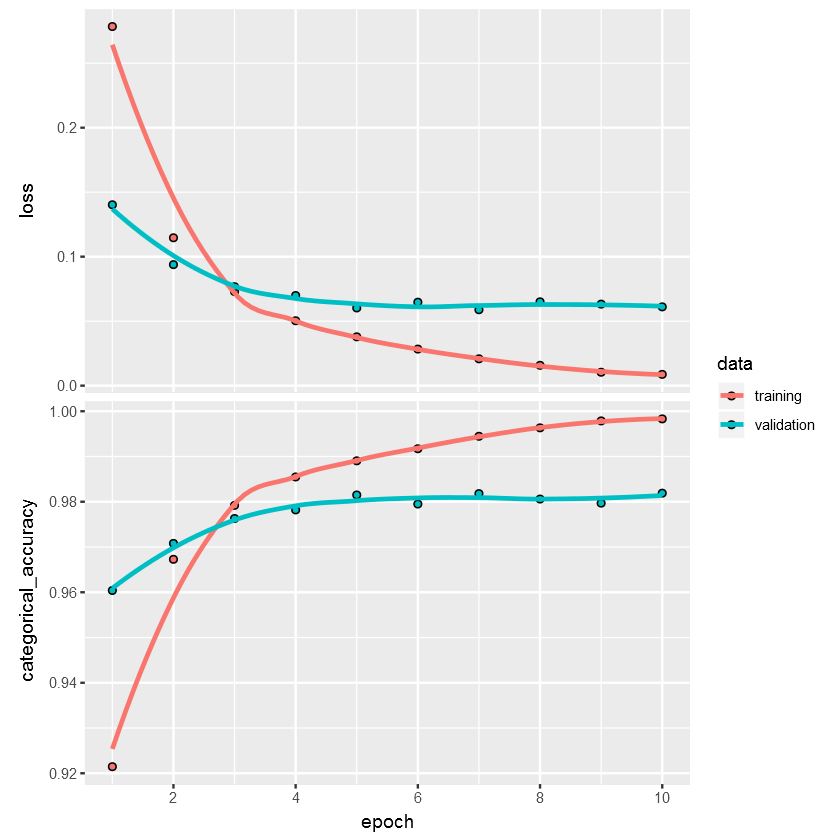

In [11]:
# Plotting training and test dynamics
plot(history, method='auto', metrics=c('loss', 'categorical_accuracy'))

# Output score metrics
scores <- model %>% evaluate(x_test, y_test, verbose=0)
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')

# Explaining How Convolutions Work

In [12]:
library(keras)

mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

# Extending image data to have a channel dimension
x_train <- array_reshape(x_train, c(dim(x_train), 1))
x_test <- array_reshape(x_test, c(dim(x_test), 1))

# We record the input shape
input_shape = dim(x_train)[2:length(dim(x_train))]

# Perform the normalization
x_train <- x_train / 255
x_test <- x_test / 255

# We count how many target classes are there
num_classes <- length(unique(y_train))

# One Hot Encode target
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)

In [13]:
# Buildin LeNet5 network
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 6, kernel_size=c(5, 5), activation='tanh', 
                input_shape=input_shape, padding='same') %>%
  layer_average_pooling_2d(pool_size=c(2, 2), strides=c(1, 1), padding='valid') %>%
  layer_conv_2d(filters = 16, kernel_size=c(5, 5), strides=c(1, 1), 
                 activation='tanh', padding='valid') %>%
  layer_average_pooling_2d(pool_size=c(2, 2), strides=c(1, 1), padding='valid') %>%
  layer_conv_2d(filters = 120, kernel_size=c(5, 5), strides=c(1, 1), 
                 activation='tanh', padding='valid') %>%
  layer_flatten() %>%
  layer_dense(units = 84, activation = 'relu') %>% 
  layer_dense(units = num_classes, activation = 'softmax')

# Compiling the model
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_sgd(),
  metrics=c('categorical_accuracy')
)

# Describing the architecture
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 28, 28, 6)               156         
________________________________________________________________________________
average_pooling2d (AveragePooling2D (None, 27, 27, 6)               0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 23, 23, 16)              2416        
________________________________________________________________________________
average_pooling2d_1 (AveragePooling (None, 22, 22, 16)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 18, 18, 120)             48120       
________________________________________________________________________________
flatten (Flatten)     

In [14]:
# Using the model
epochs=50
batch_size=64

history <- model %>% fit(
                x_train, y_train,
                batch_size = batch_size,
                epochs = epochs,
                validation_data=list(x_test, y_test),
                verbose=1
)

Test loss: 0.05963022 
Test accuracy: 0.9861 


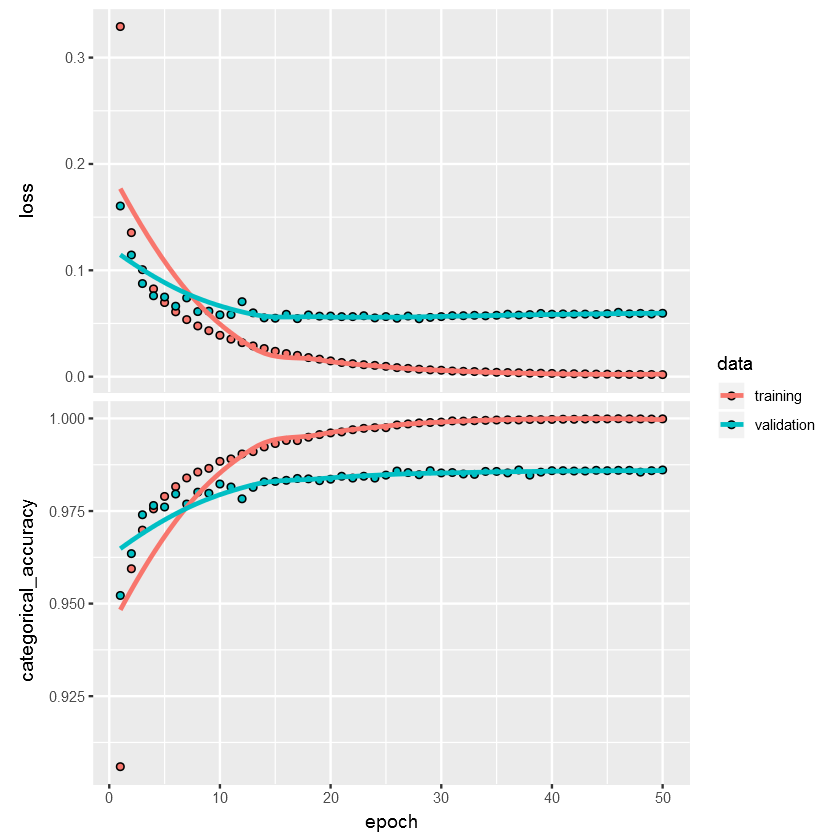

In [15]:
# Plotting training and test dynamics
plot(history, method='auto', metrics=c('loss', 'categorical_accuracy'))

# Output metrics
scores <- model %>% evaluate(x_test, y_test, verbose=0)
cat('Test loss:', scores[[1]], '\n')
cat('Test accuracy:', scores[[2]], '\n')